# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

import yake

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mbaz0012\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mbaz0012\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data_path = "../../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
#decade-1: nos queda entonces 195x, entonces vamos a buscar todos los articulos de cette décennie

In [6]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [7]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [8]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [9]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\mbaz0012\TAC_test\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
# Détail de la matrice
tfidf_vectors
#ici 1004x3491, 1004 articulos y 3491 palabras

<1000x2998 sparse matrix of type '<class 'numpy.float64'>'
	with 591558 stored elements in Compressed Sparse Row format>

### Tests sur nos documents

In [11]:
tfidf_array = tfidf_vectors.toarray()

In [12]:
cosine(tfidf_array[0], tfidf_array[1])

0.9628761011759681

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [27]:
N_CLUSTERS = 11
#arrancamos con 5 y después testeamos con 3 que parece ser más coherentes, más homogeneo

### Instancier le modèle K-Means et ses arguments

In [28]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [29]:
clusters = km_model.fit_predict(tfidf_vectors)

In [30]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(texts[idx])

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [31]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())
#el algo reduce de 3000 y pico de dimensiones a dos dimensiones, para que sea comprensible para nosotros humanos y que sea fácil de visualizar

### Générer le plot

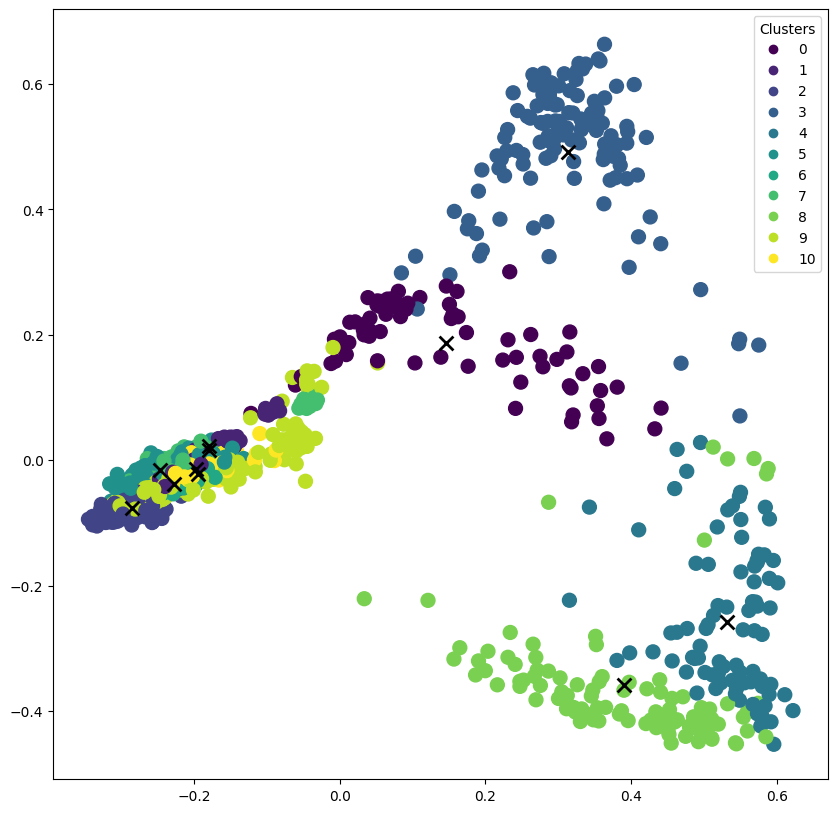

In [32]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

Extraction des mots clés par cluster

In [33]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "soir", "rue", "tél", 
       "bruxelles", "prix", "app", "ecr", "maison", "ans", "brux", "bon", "agence", 
       "louer", "francs", "très", "avenue", "grand", "marché", "cherche", "vend", 
       "chaussée", "occasion", "vendre", "cours", "meubles", "libre", "ecrire", "villa", 
       "cuis", "conf", "mod", "mois", "part", "bel", "garage", "vis", "voiture", 
       "nouvelle", "Liège","Waterloo", "vente", "juin", "téléph", "adr", "meub", "frs", 
       "louise", "Ixelles", "Uccle", "LIBRE", "Libre", "jard", "JARD", "gar", "GAR", 
       "APPART", "appart", "Appart", "heures", "état", "place", "lib", "neuf", "terr", 
       "beau", "chauff", "demande", "bonne", "pièces", "rez", "samedi", "etc", "parc", 
       "juillet", "PET", "grande", "peu", "toute", "avant", "nord", "centre", "pers",
       "ETAT", "jours", "belle", "midi", "mer", "près", "Anvers", "jardin", "porte", 
       "Liège","dimanche", "pet", "temps", "pays", "jour", "Etat", "ANVERS", "leurs",
       "Belgique", "terrain", "Saint", "quart", "quelques", "lieu", "Paris", "partie",
       "sal", "Porte", "inst", "Mai", "jeudi", "Août", "mardi", "prés", "cuisine", 
       "matin", "Renault", "hôtel", "cave", "travaux", "crédit", "faç", "eau", "chamb", 
       "Charleroi", "vue", "anvers", "belgique", "BELGIQUE", "SAINT", "saint", "UCCLE",
       "uccle", "paris", "PARIS", "MAI","août", "dés", "vie", "lundi", "petit", "France", 
       "dame", "situation", "rapport", "ceux", "aven", "max", "MAX", "tour", "ach", "ACH",
       "mai", "Mai", "France", "service", "année", "devant", "Liège", "MIN", "min", "Mons", 
       "suite", "fois", "car", "cour", "bois", "chf", "CHF", "confort", "chez", "point", 
       "pens", "première", "vers", "ordre", "dès", "jeune", "salle", "travail", "gros", 
       "celui", "comm", "COMM", "cent", "toujours", "tel", "TEL", "minute", "env", "ENV", 
       "bourse", "français", "déjà", "Namur", "trav", "TRAV", "bureau", "pierre", "enfants", 
       "enf", "ENF", "sit", "SIT", "WATERLOO", "lux", "LUX", "elles", "gare", "Gare", "mars", 
       "Mars", "bas", "ford", "Ford", "dernier", "monde", "chambre", "auto", "radio", "alors", 
       "com", "COM", "Charleroi", "cher", "homme", "nouveau", "rien", "étage", "jeu", "art", 
       "grd", "GRD", "IXELLES", "voir", "seul", "pension", "janvier", "Janvier", "mme", "MME", 
       "hommes", "mat", "MAT", "voit", "offre", "OFFRE", "femme", "rapp", "RAPP", "moment", 
       "commerce", "moderne", "bain"
       ]
sw = set(sw)
kw_extractor = yake.KeywordExtractor(lan="fr", top=50, n=3, stopwords=sw)

cluster_keywords = {}

for cluster, docs in clustering.items():
    full_text = "\n".join(docs)   
    keywords = kw_extractor.extract_keywords(full_text)

    bigrams = [kw for kw, score in keywords if len(kw.split()) == 2]

    
    if not bigrams:
        bigrams = [kw for kw, score in keywords[:10]]

    cluster_keywords[cluster] = bigrams[:10]

print("\nMots clés par cluster")
for cluster in sorted(cluster_keywords.keys()):
    print(f"\nCluster {cluster}:")
    print(", ".join(cluster_keywords[cluster]))


Mots clés par cluster

Cluster 0:
Opel Rekord, Opel Rek, FIAT FIAT, Opel Caravan, garantie totale, Cse santé, Dauphine Luxe, OPEL KAP

Cluster 1:
New York, Liège Liège, Royal Dutch, Société Générale, Emp Emp

Cluster 2:
Premier ministre, Nations Unies, New York, conseil communal, gouvernement belge, conseil économique, Affaires étrangères, Conseil national, Affaires économiques, Défense nationale

Cluster 3:
HAUT STANDING, Office Propriétaires, BEAUX APPARTEMENTS, chf. maz, plein sud, chff. maz, Brabant Wallon, QUARTIER BASILIQUE, COSTA BRAVA, Lux. app.

Cluster 4:
DEM. fem, jne fille, servante Int, dem. serveuse, Jne servante, jne serveuse, Servante Interne, dem. mén, Jnes filles, Jne fem

Cluster 5:
DIVISION III, Deuxième course, Troisième course, Quatrième course, Coupe d’Europe, Cinquième course, Sixième course, simple messieurs, NAMUR DIVISION, Septième course

Cluster 6:
MADAME VEUVE, Madame Jean, avis tient, MONSIEUR Jean, madame Paul, Madame Albert, Madame Jacques, Madame Geor